# CollabMP3

### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [82]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [83]:
def visualize(data):
    corr = data.corr(method="pearson")
    plt.figure(figsize=(14,6))
    heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
    heatmap.set_title("Correlation")
    
    sample = data.sample(int(0.001*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")
    
    sns.set_style(style="darkgrid")
    plt.title("Duration of Songs")
    sns.color_palette("rocket", as_cmap = True)
    sns.barplot(y="genre", x="duration_ms", data = data)

    sns.set_style(style = "darkgrid")
    plt.figure(figsize=(10,5))
    famous = data.sort_values("popularity", ascending=False)
    sns.barplot(y="genre", x="popularity", data = famous).set(title="Top Genres by Popularity")

Number of samples taken:  232


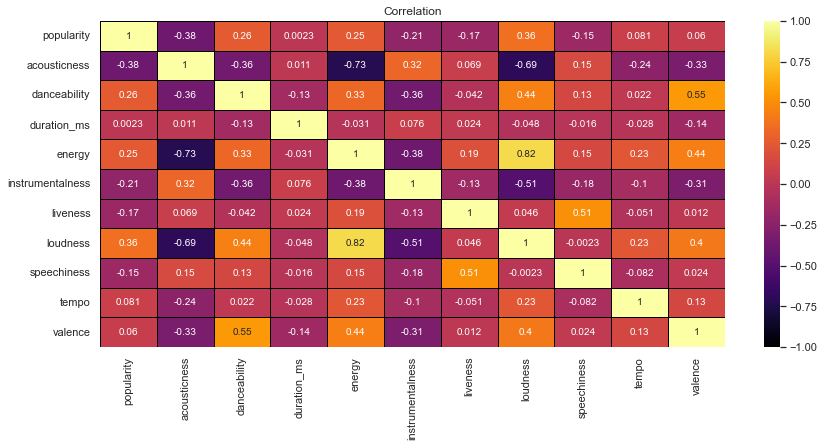

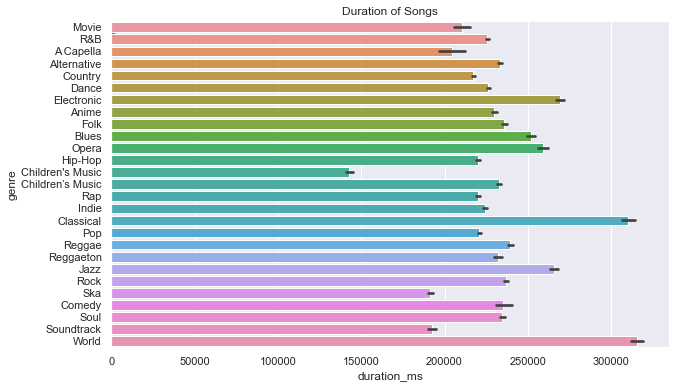

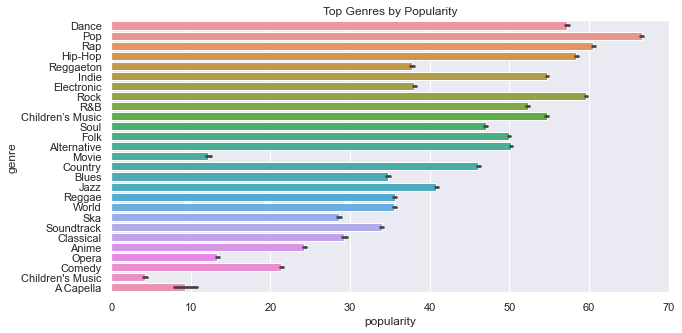

In [84]:
visualize(data)

In [85]:
def plot1(data):
    print("Mean value of acousticness:", data['acousticness'].mean())
    sns.histplot(x='acousticness', data=data, kde=True)
    plt.xlabel('Acoustincess', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

def plot2(data):
    # mean value and histplot for for energy feature
    print("Mean value of energy:", data['energy'].mean())
    sns.histplot(x='energy', data=data, kde=True)
    plt.xlabel('Energy', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

Mean value of acousticness: 0.36856045175644825


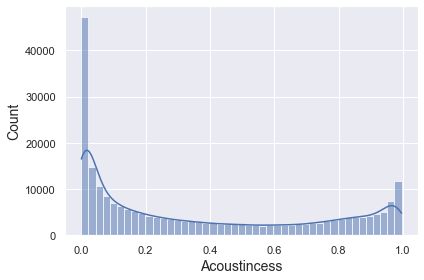

In [86]:
plot1(data)

Mean value of energy: 0.57095767347127


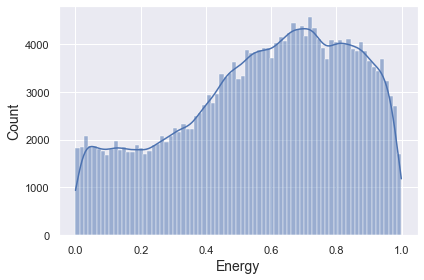

In [87]:
plot2(data)

In [88]:
def plot3(data):
    sample = data.sample(int(0.001*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

Number of samples taken:  232


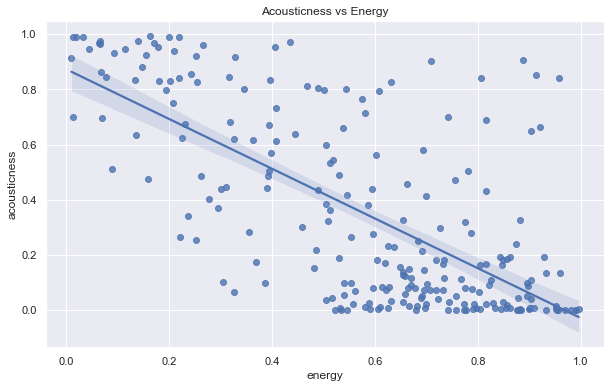

In [89]:
plot3(data)

### Cluster creation

In [90]:
def plot_clus(X, Y, kmeans):
    plt.figure(figsize=(10,6))
    plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
    plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
    plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')
    plt.title("Clusters")

def cluster(data):
    X = data.iloc[:, [5,8]].values
    
    wcss = []
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
    
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.show()
    
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 
    
    Y = kmeans.fit_predict(X)
    
    plot_clus(X, Y, kmeans)

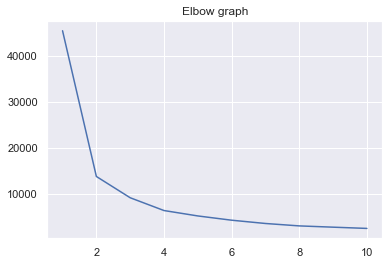

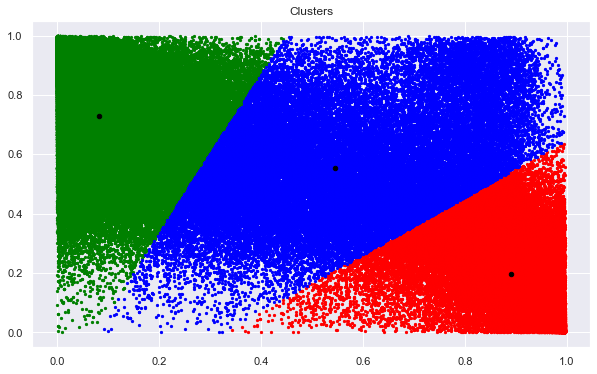

In [91]:
cluster(data)

Most Popular Songs

In [92]:
def most_popular(data):
    df2 = data.copy()
    df2.drop_duplicates(subset = "track_name", inplace = True) #dropping duplicate songs
    df2.head()
    
    rslt_df = df2.sort_values(by = 'popularity', ascending = False)
    rslt_df = rslt_df[['genre', 'artist_name', 'track_name']]
    
    print("Top 10 most popular songs:\n")
    for i in range(10):
        row_list = rslt_df.loc[i, :].values.flatten().tolist()
        print(row_list[1], "-", row_list[2])

In [93]:
most_popular(data)

Top 10 most popular songs:

Henri Salvador - C'est beau de faire un Show
Martin & les fées - Perdu d'avance (par Gad Elmaleh)
Joseph Williams - Don't Let Me Be Lonely Tonight
Henri Salvador - Dis-moi Monsieur Gordon Cooper
Fabien Nataf - Ouverture
Henri Salvador - Le petit souper aux chandelles
Martin & les fées - Premières recherches (par Paul Ventimila, Lorie Pester, Véronique Jannot, Michèle Laroque & Gérard Lenorman)
Laura Mayne - Let Me Let Go
Chorus - Helka
Le Club des Juniors - Les bisous des bisounours


### Code for single track that is being playing in real time by the user

In [94]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

client_ID = "7f43ef2510664eb1bc313596b46800ca"
client_SECRET = "57cfb3ffb5d84ef7b922cc8c4a9181aa"
redirect_url= "http://localhost:9000"

sp= spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_ID, 
                                                      client_secret=client_SECRET,
                                                      redirect_uri=redirect_url, 
                                                      scope="user-read-playback-state", 
                                                      open_browser=True))

# client_ID='279311a4db264aeb86a9848fa6cb5056'
# client_SECRET= 'f3cbc5b8cf5e4252a5a7add41e213641'

In [95]:
def read_current_play(sp):
    try:
        results= sp.current_playback()
    except:
        sp= spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_ID, 
                                                      client_secret=client_SECRET,
                                                      redirect_uri=redirect_url, 
                                                      scope="user-read-playback-state", 
                                                      open_browser=True)).current_playback()
        results= sp.current_playback()
    return currently_playing(results)

In [96]:
def get_features(play):
  df=  pd.DataFrame(sp.audio_features(play.id))
  return df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'])

In [97]:
class currently_playing:
  def __init__(self, results):
    self.results= results
    self.id= results['item']['id']
    self.time= results['item']['duration_ms']
    self.popularity= results['item']['popularity']
  def info(self):
    name= []
    print(f"Track name: {self.results['item']['album']['name']}")
    for artist in self.results["item"]["artists"]:
        name.append(artist['name'])
    print("Artists: ", end="")
    print(", ".join(name))
    print(f"Popularity: {self.popularity}")
    print(f"Release Date: {self.results['item']['album']['release_date']}")
  def artists(self):
    artist_ids= []
    for artist in self.results["item"]["artists"]:
        artist_ids.append(artist['id'])
    return artist_ids
  def track_name(self):
    return self.results['item']['album']['name']

In [98]:
playing= read_current_play(sp)

In [99]:
play_df = get_features(playing)
play_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.773,0.795,8,-5.537,0,0.0412,0.0587,0.00237,0.154,0.649,115.997,0CtZpaOhtzvLV3FfcsVpQo,258474,4


### Plotting current song on the plot

In [100]:
A = []
def song_features(data):
    B = []

    data = data.values.tolist()
#     print(data[0][1])
#     print(data[0][6])

    B.append(data[0][1])
    B.append(data[0][6])

    A.append(B)
#     print(A)

In [101]:
song_features(play_df)

In [102]:
from scipy.spatial import distance

def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color)
    plot.figure(figsize=(10,6))
    plot.show()

def cal_cluster(A):
    dist=[]
    X = data.iloc[:, [5,8]].values
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)     
    Y = kmeans.fit_predict(X)
    for i in range(len(kmeans.cluster_centers_)):
        dist.append(distance.euclidean(kmeans.cluster_centers_[i], A))
#     print(dist)
    num = pd.Series(dist).idxmin()

    if(num==0):
        print("Song is in RED cluster")
    elif(num==1):
        print("Song is in GREEN cluster")
    else:
        print("Song is in BLUE cluster")
    return num

Song is in RED cluster


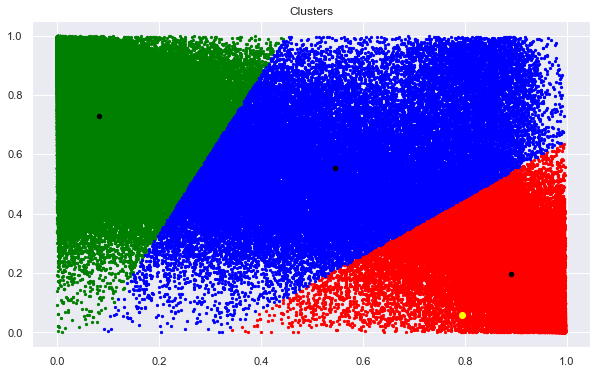

<Figure size 720x432 with 0 Axes>

In [103]:
#determining which cluster the given song is in
num = cal_cluster(A)

X = data.iloc[:, [5,8]].values
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)     
Y = kmeans.fit_predict(X)

#plotting the song in the scatter plot
plot_clus(X, Y, kmeans)
AddPoint(plt, A[0][0], A[0][1], 'yellow')

### Euclidean Distance

In [104]:
import math

def recommend(flag):
    eDist=[]
    for i in range(len(X[Y==flag])):
        eDistance = math.dist(A[0], X[Y==flag][i])
        eDist.append(eDistance)
    
    eDist2 = []
    eDist2.extend(eDist)
    eDist2.sort()
    eDist2
    
    for i in range(5):
        num = eDist.index(eDist2[i])
        arr = data.loc[(data['energy'] == X[Y==flag][num][1]) & (data['acousticness'] == X[Y==flag][num][0])]
        arr = arr.values.flatten().tolist()
        print(arr[2] , 'by', arr[1])

In [105]:
recommend(num)

Goldberg Variations: Goldberg Variations: Aria by Johann Sebastian Bach
Is That All There Is? - Remastered by Peggy Lee
Breathe (Spontaneous) [Live] by Amanda Lindsey Cook
I Like an Apple on a Stick by Kimbo Children's Music
Lemminkainen Suite, Op. 22: II. The Swan of Tuonela by Jean Sibelius
